# Brain Tumour Classification

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D, Dropout, MaxPooling2D, Dense, Flatten
%matplotlib inline

In [45]:
# Building model
classifier = Sequential()

classifier.add(Convolution2D(100, (3,3), activation='relu', input_shape=(150, 150, 3)))
classifier.add(MaxPooling2D(2,2))

classifier.add(Convolution2D(100, (3,3), activation='relu'))
classifier.add(MaxPooling2D(2,2))

classifier.add(Flatten())
classifier.add(Dropout(0.5))

classifier.add(Dense(50, activation='relu'))
classifier.add(Dense(4, activation='softmax'))

In [46]:
# Model Summary
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 148, 148, 100)     2800      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 74, 74, 100)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 72, 72, 100)       90100     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 36, 36, 100)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 129600)            0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 129600)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 50)               

In [47]:
# Compiling the model
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [48]:
# Loading data and Image Augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1.0/255)
train_generator = train_datagen.flow_from_directory('dataset/Training', 
                                                    batch_size=10, 
                                                    target_size=(150, 150))
validation_datagen = ImageDataGenerator(rescale=1.0/255)
validation_generator = validation_datagen.flow_from_directory('dataset/Testing', 
                                                         batch_size=10, 
                                                         target_size=(150, 150))

Found 2870 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


In [50]:
# Model Checkpointing
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint
checkpoint = ModelCheckpoint('model2-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')

In [51]:
# Training Model
history = classifier.fit(train_generator,
                                   epochs=3,
                                   validation_data=validation_generator,
                                   callbacks=[checkpoint],)

Epoch 1/3
287/287 [==============================] - 133s 463ms/step - loss: 0.3908 - accuracy: 0.6185 - val_loss: 0.5957 - val_accuracy: 0.4264
Epoch 2/3
287/287 [==============================] - 133s 465ms/step - loss: 0.2288 - accuracy: 0.8045 - val_loss: 0.6457 - val_accuracy: 0.5431
Epoch 3/3
287/287 [==============================] - 136s 473ms/step - loss: 0.1491 - accuracy: 0.8774 - val_loss: 0.6582 - val_accuracy: 0.6168


Text(0.5, 1.0, 'Accuracy Curve')

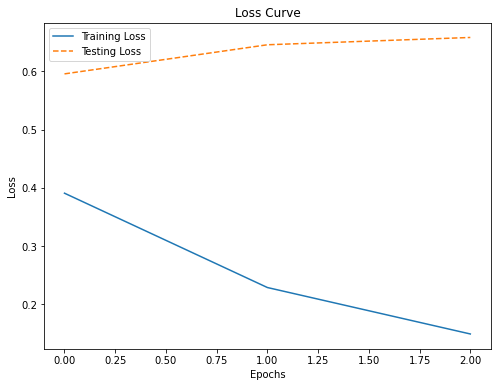

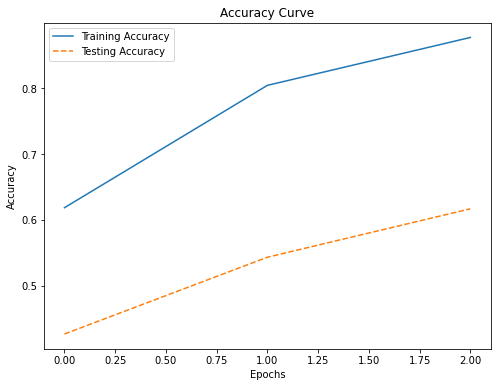

In [52]:
# Loss Curves
plt.figure(figsize=(8,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'],ls='--')
plt.legend(['Training Loss','Testing Loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title("Loss Curve")

# Accuracy Curves
plt.figure(figsize=(8,6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'],ls='--')
plt.legend(['Training Accuracy','Testing Accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Accuracy Curve")

In [53]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

img = img_to_array(load_img('dataset/Training/glioma_tumor/gg (2).jpg'))
img.resize((150,150,3))
img = np.reshape(img,(1,150,150,3))


In [54]:
validation_generator.class_indices

{'glioma_tumor': 0, 'meningioma_tumor': 1, 'no_tumor': 2, 'pituitary_tumor': 3}

In [55]:
#Confusion Matrix and Classification Report
from sklearn.metrics import confusion_matrix, classification_report

Y_pred = classifier.predict(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
target_names = ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

Confusion Matrix
[[243 215 125 243]
 [231 232 109 250]
 [117 115  53 110]
 [240 233 124 230]]
Classification Report
                  precision    recall  f1-score   support

    glioma_tumor       0.29      0.29      0.29       826
meningioma_tumor       0.29      0.28      0.29       822
        no_tumor       0.13      0.13      0.13       395
 pituitary_tumor       0.28      0.28      0.28       827

        accuracy                           0.26      2870
       macro avg       0.25      0.25      0.25      2870
    weighted avg       0.27      0.26      0.26      2870

